# customer segmentation with K-Means algorithm

## 1- Introduction

In this project, I use a dataset from the **Kaggle website** and cluster bank credit card customers into different groups based on the **K-means model**. It has been tried to cluster customers into the clusters and groups introduced in the following study:  
https://www.mckinsey.com/~/media/mckinsey/dotcom/client_service/financial%20services/latest%20thinking/payments/mop19_new%20frontiers%20in%20credit%20card%20segmentation.ashx  

**Data Address**: 
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [23]:
#importing necessary libraries and packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# magic word for producing visualizations in notebook
%matplotlib inline
# For Standardisation
from sklearn.preprocessing import StandardScaler
# For Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
# For K-means
from sklearn.cluster import KMeans
# For PCA
from sklearn.decomposition import PCA

## 2- loading data and doing some explorations

In [24]:
#importing data
data_seg=pd.read_csv ('Customer_Data (1).csv',index_col=0)

In [25]:
data_seg.head ()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
data_seg.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


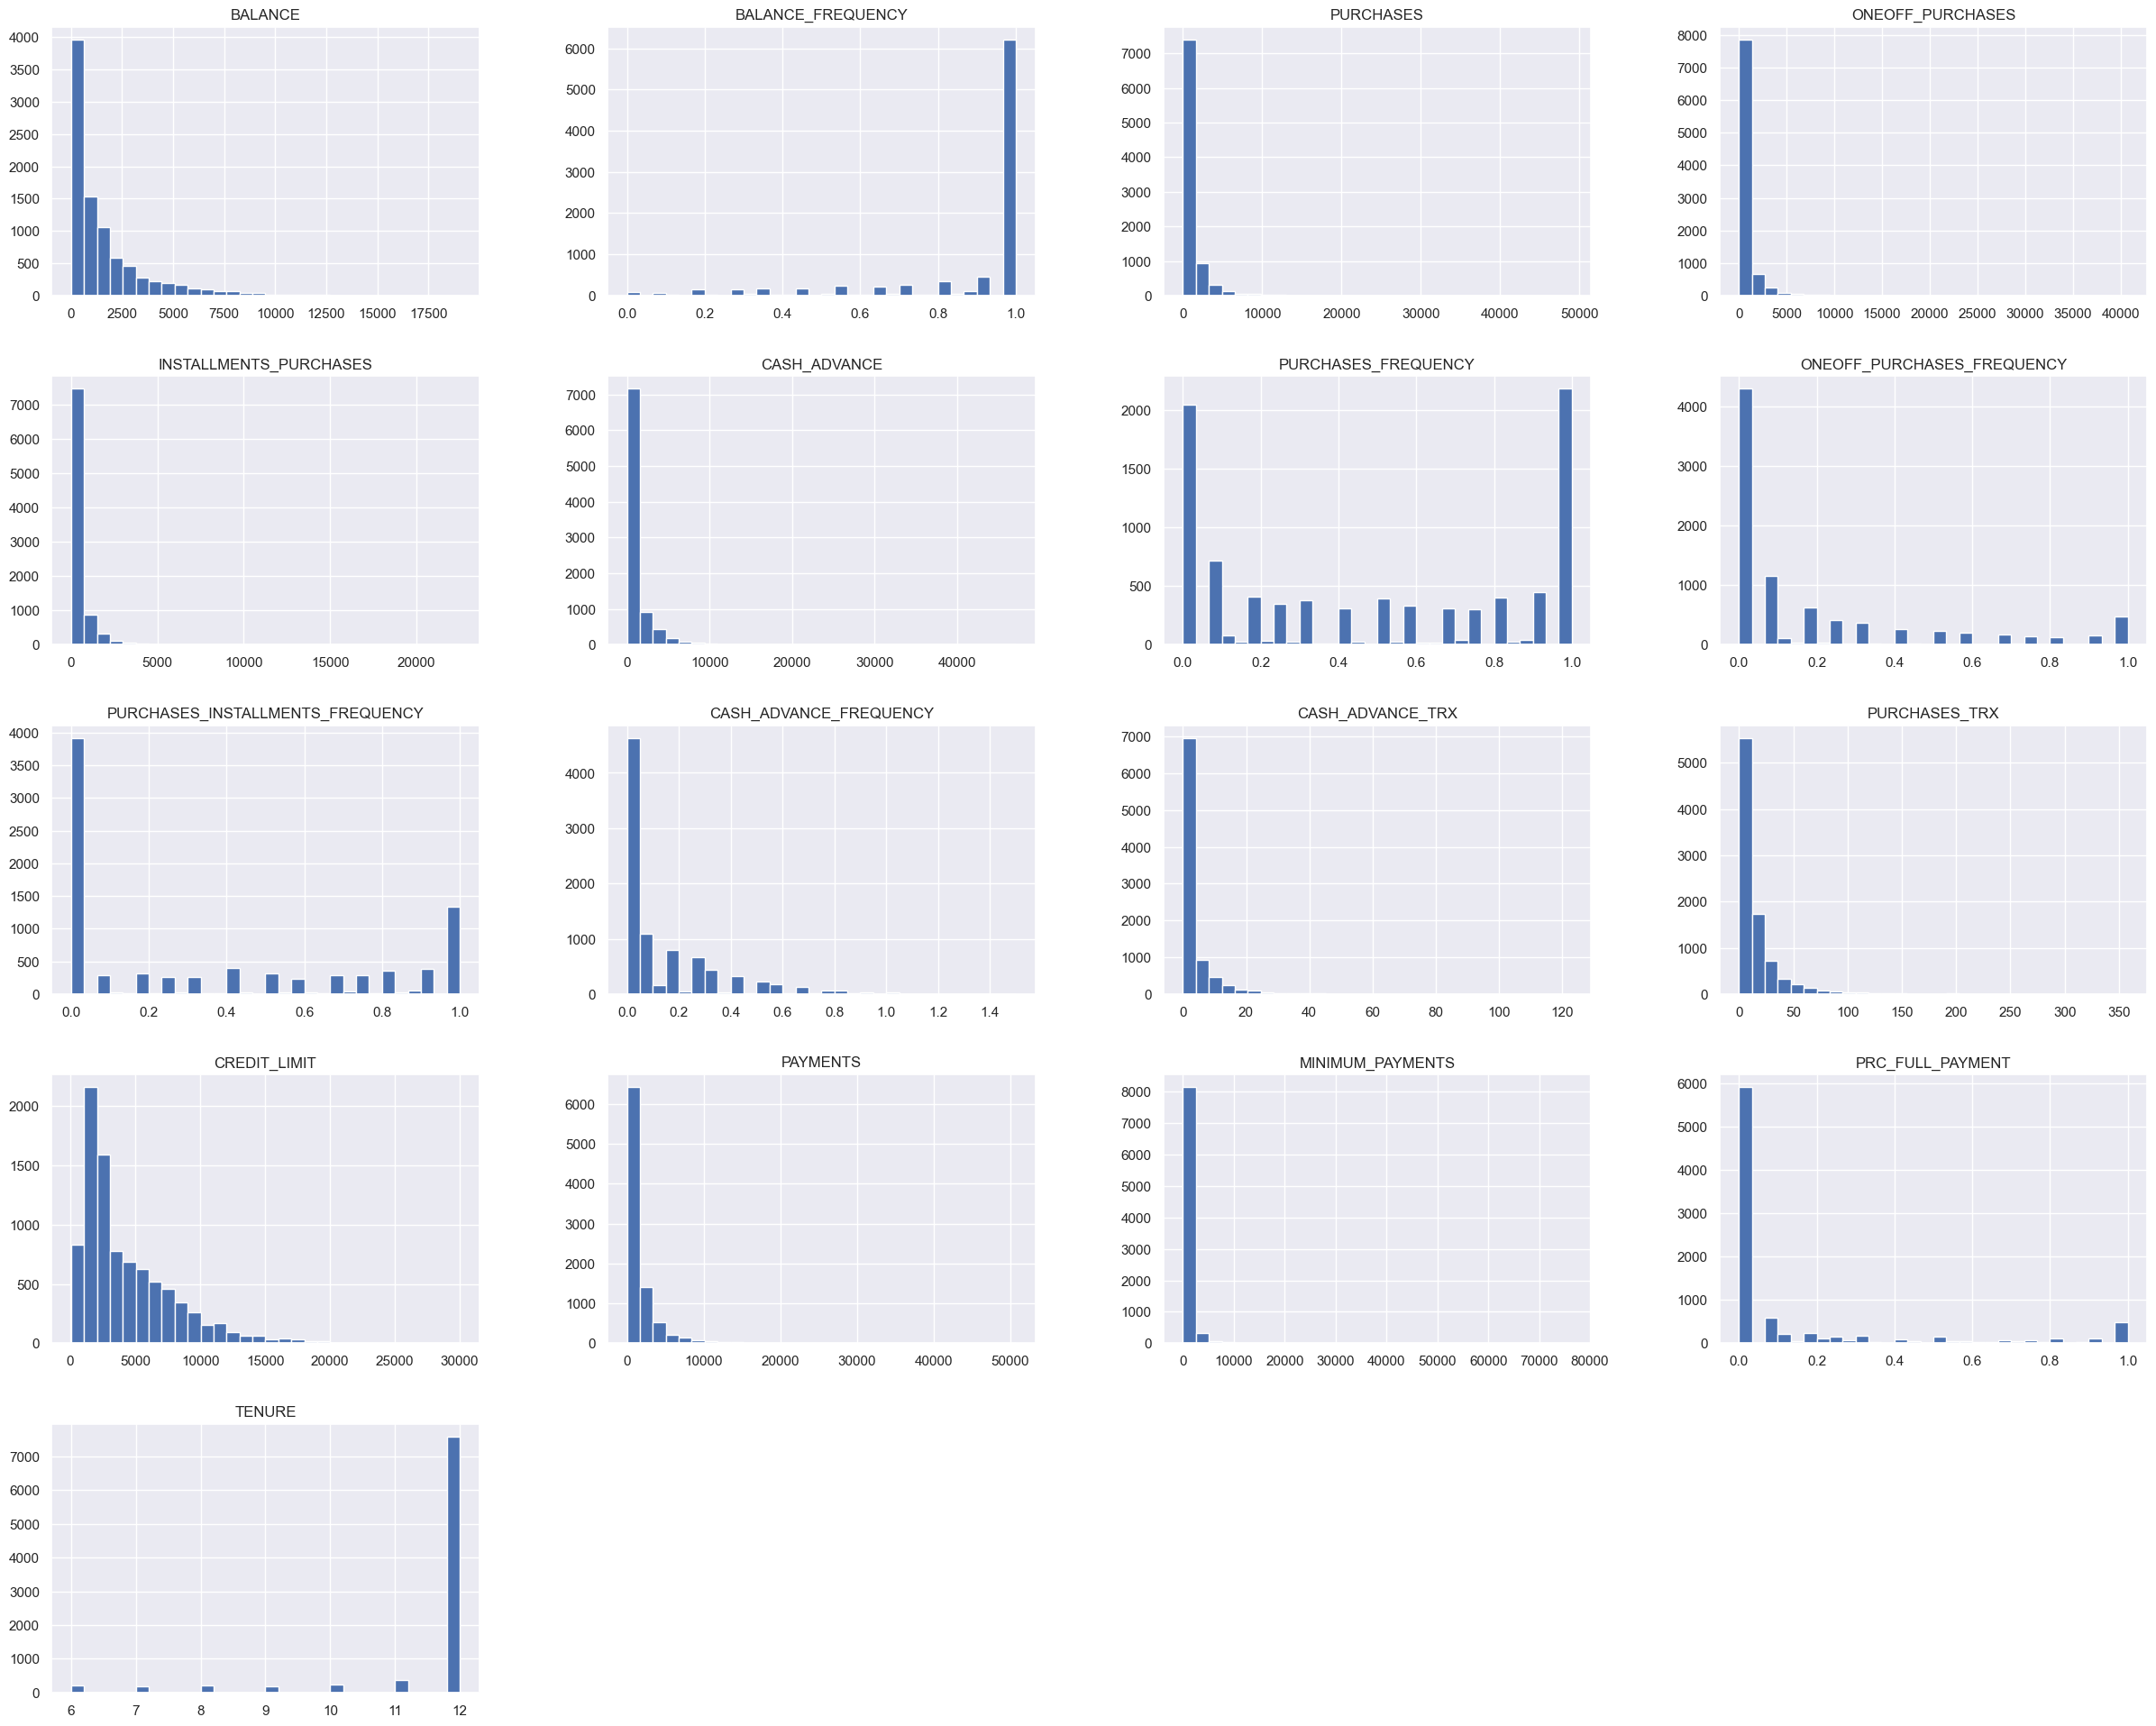

In [27]:
_=data_seg.hist(bins=30, figsize=(30, 24))

From the above histogram, we can conclude that almost all the variables are very **skewed and not symmetrical**.

In [28]:
data_seg.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


Exploring the correlation between the features is the first step to identifying similar customers and putting them together in groups which is the essence of segmentation. In the above correlation matrix we can see that **PURCHASES Variable** have a high correlation with PURCHASES_TRX and PAYMENTS variables. It seems quite logical that the more the number of purchases, the higher the probability of the total purchase amount. Also, people who make more purchases with credit cards try to make their payments regularly and therefore the PAYMENTS level will be higher. People who use a credit card in the form of cash advance will also have a lower purchase amount (negative correlation between PURCHASES and CASH_ADVANCE).

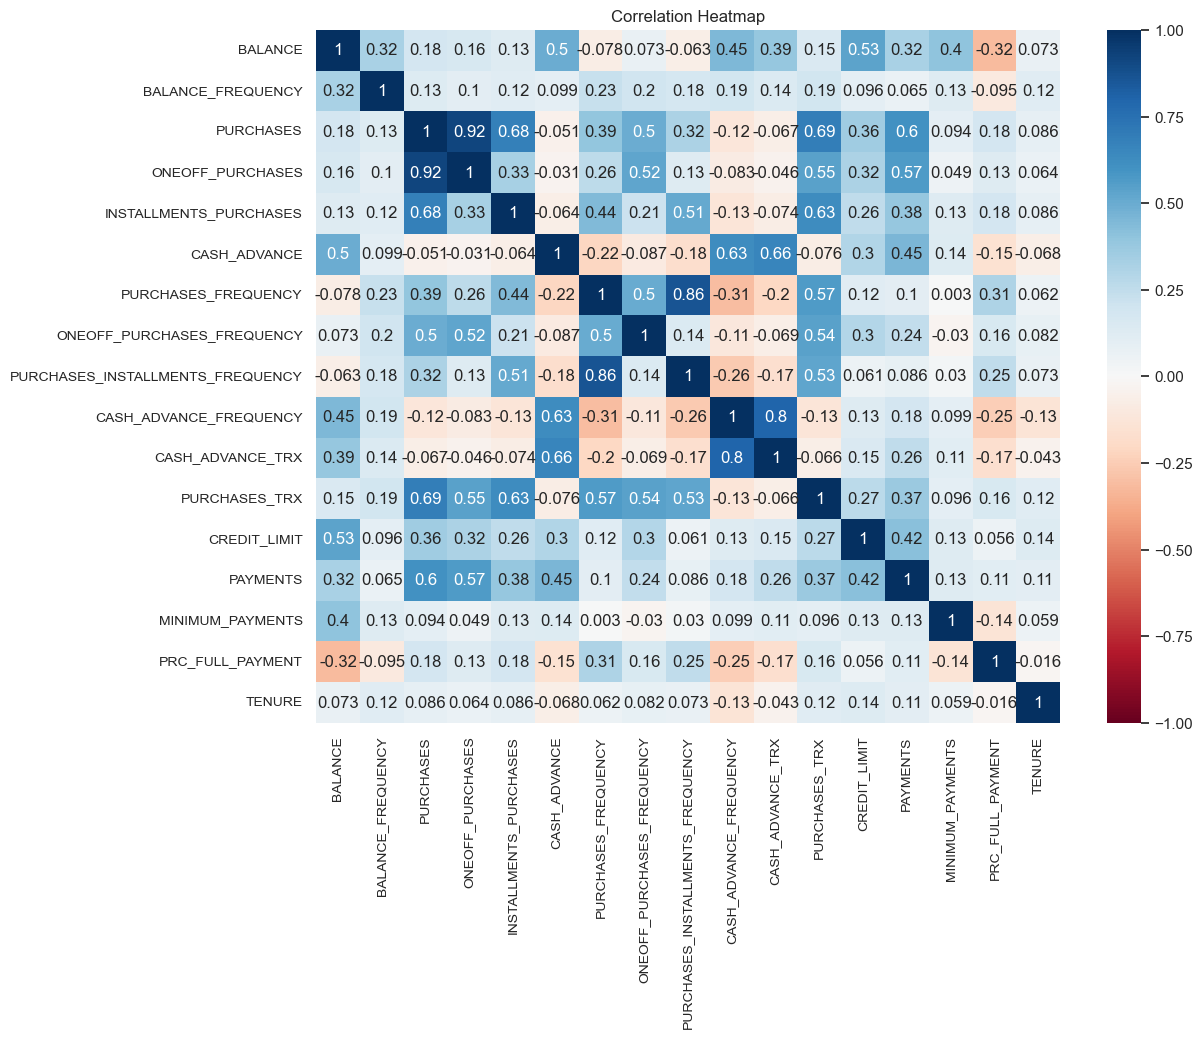

In [29]:
#Correlation heatmap
plt.figure(figsize=(12,9))
Vis=sns.heatmap(data_seg.corr(),annot=True, cmap='RdBu',vmin=-1,vmax=1)
Vis.set_yticklabels(Vis.get_yticklabels(),rotation=0,fontsize=10)
Vis.set_xticklabels(Vis.get_xticklabels(),rotation=90,fontsize=10)
plt.title ('Correlation Heatmap')
plt.show ()

## 3- Preprocessing

### 3-1- Checking for missing values

In [30]:
data_seg.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

For CREDIT_LIMIT we use the **median** of all values to replace the only missing value.

In [31]:
data_seg['CREDIT_LIMIT'].fillna(data_seg['CREDIT_LIMIT'].median(),inplace=True)

In [32]:
data_seg.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

But for the MINIMUM_PAYMENTS variable, we use the **mean values** to replace the missing values.

In [33]:
data_seg['MINIMUM_PAYMENTS'].fillna(data_seg['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [34]:
data_seg.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

As can be seen, there is no more missing data.

### 3-2- Balancing purchase data (Purchase=ONEOFF_PURCHASES+INSTALLMENTS_PURCHASES)

In [35]:
UnbalPurchase=data_seg.loc[round(data_seg['PURCHASES'],2)!=round((data_seg['ONEOFF_PURCHASES']\
                           +data_seg['INSTALLMENTS_PURCHASES']),2)]
UnbalPurchase

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10533,32.042424,0.909091,400.41,0.00,489.39,0.000000,0.833333,0.000000,0.750000,0.000000,0,11,4500.0,353.570259,132.131820,0.666667,12
C10772,1544.979869,1.000000,880.19,0.00,927.45,0.000000,1.000000,0.000000,1.000000,0.000000,0,46,1500.0,1189.503063,1104.152962,0.000000,12
C10940,939.152528,1.000000,3393.25,3364.59,77.66,0.000000,0.250000,0.250000,0.083333,0.000000,0,5,9000.0,2768.821579,267.093439,0.000000,12
C11506,4.382924,0.272727,130.24,0.00,152.24,0.000000,0.083333,0.000000,0.083333,0.000000,0,0,14000.0,28988.973880,1092.184812,0.500000,12
C14099,2552.597938,1.000000,550.62,0.00,583.95,0.000000,1.000000,0.000000,0.916667,0.000000,0,24,3000.0,478.632499,1080.350480,0.000000,12
C14810,1089.795044,1.000000,0.00,0.00,20.00,38.249993,0.000000,0.000000,0.166667,0.083333,1,1,1200.0,284.731156,331.103830,0.000000,12
C15378,30.692503,0.454545,205.06,0.00,607.76,0.000000,0.916667,0.000000,1.000000,0.000000,0,35,4500.0,163.982192,55.660981,0.000000,12
C15508,3093.592745,1.000000,47.69,82.41,0.00,1438.951061,0.166667,0.083333,0.000000,0.583333,15,1,4100.0,4591.237633,723.343619,0.000000,12
C15897,10243.147630,1.000000,0.00,0.00,66.95,4501.067550,0.000000,0.000000,0.083333,0.250000,5,0,13000.0,1882.490974,5624.605818,0.000000,12


In [36]:
#We recalculate Purchase as the sum of ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES
data_seg.loc[:,'PURCHASES']=data_seg.loc[:,'ONEOFF_PURCHASES']+data_seg.loc[:,'INSTALLMENTS_PURCHASES']

### 3-3- Standardisation

In [37]:
sc= StandardScaler()
data_seg_st= sc.fit_transform(data_seg)

## 4- K- means Clustering

### 4-1- determining the number of clusters

#### 4-1-1- determining the number of clusters by Hierarchical Clustering 

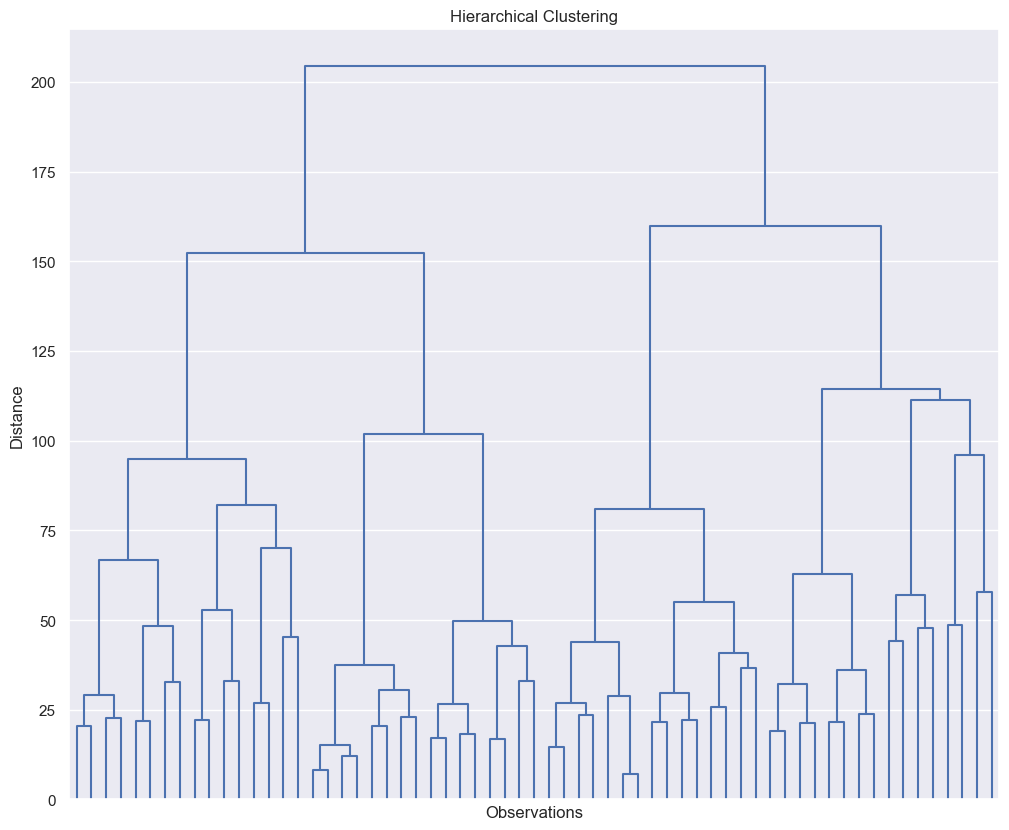

In [38]:
HClustering= linkage(data_seg_st,method='ward')
plt.figure (figsize=(12,10))
plt.title ('Hierarchical Clustering')
plt.xlabel ('Observations')
plt.ylabel ('Distance')
dendrogram (HClustering, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True, color_threshold=0)
plt.show()

By looking at the dendrogram diagram in general, we can have a general view about the number of suitable clusters. According to the obtained result, the number of 5 clusters can be considered reasonable.

#### 4-1-2- determining the number of clusters by Elbow method

We run the algorithm for 10 different times with 10 different number of clusters. We calculate **the Within Cluster Sum of Squares (WCSS)** for each of the clustering solutions.

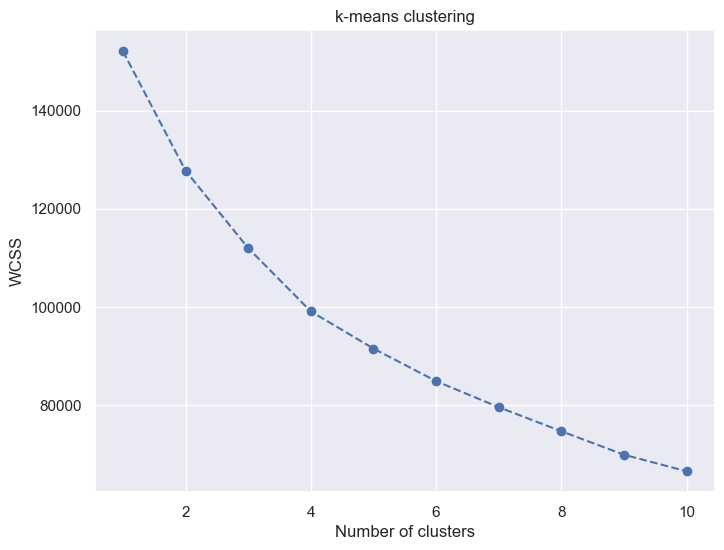

In [39]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans (n_clusters=i, init='k-means++',random_state=123)
    kmeans.fit(data_seg_st)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot (range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel ('Number of clusters')
plt.ylabel ('WCSS')
plt.title('k-means clustering')
plt.show()

Here, the use of 5 clusters can be reasonable, and since we want to map the number of five clusters introduced in the McKinsey study, we set the number of clusters to 5.

### 4-2- Running the model and the results

In [40]:
kmeans=KMeans (n_clusters=5, init='k-means++', random_state=123)
kmeans.fit (data_seg_st)

KMeans(n_clusters=5, random_state=123)

In [41]:
#Results
data_seg_kmeans=data_seg.copy()
data_seg_kmeans['K-means segment']=kmeans.labels_

In [42]:
data_seg_results=data_seg_kmeans.groupby(['K-means segment']).mean()
data_seg_results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
K-means segment,,,,,,,,,,,,,,,,,
0,1894.697328,0.979455,2918.342726,1987.365134,930.977592,353.664281,0.923933,0.734171,0.585533,0.058234,1.155459,43.543022,6975.775324,2777.435595,829.815490,0.265719,11.887925
1,1055.782527,0.797277,278.903627,225.597146,53.306480,621.426219,0.163313,0.096803,0.065771,0.118988,2.213466,2.951798,3346.319816,1005.956760,600.575314,0.070492,11.455241
2,645.271105,0.902145,798.373466,166.799462,631.574004,178.022789,0.856492,0.083437,0.794013,0.038031,0.709317,16.644720,3199.298680,934.485329,678.731868,0.271871,11.455072
3,4622.768927,0.967852,495.021904,303.183397,191.838507,4641.104906,0.281434,0.130960,0.182778,0.491942,14.698690,7.393013,7558.693926,3606.372749,2010.529530,0.036109,11.379913
4,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116


I have named the clusters based on the **McKinsey study** as follows:  
Cluster 0: Customers with relatively moderate balance and high purchases and  purchase transactions: "**SelfAwareAvoiders**" 

Cluster 1: Customers with low balance and the lowest purchases: "**RecoveringCreditUsers**"

Cluster 2: Customers with the lowest Balance, Oneoff purchases and Cash_advance, and with relatively high purchase frequency: "**FinanciallyStressed**"  

Cluster 3: Customers with highest balance and Cash_advance and low amount of purchases : "**DealChasers**" 

Cluster 4: Customers with high balance, the highest purchases (mostly one-off purchases) and purchase transactions and credit limit: "**ProsperousAndConsent**"

In [43]:
#Number of Observations in each cluster
data_seg_results ['NObservations']= data_seg_kmeans[['K-means segment','PURCHASES']].groupby (['K-means segment']).count()

#proportion of observations
data_seg_results ['PropObservations']=data_seg_results ['NObservations']/data_seg_results ['NObservations'].sum()
data_seg_results=data_seg_results.rename ({0: 'SelfAwareAvoiders', 1: 'RecoveringCreditUsers', 2: 'FinanciallyStressed'\
                                           , 3: 'DealChasers', 4:'ProsperousAndConsent'})
data_seg_results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,NObservations,PropObservations
K-means segment,,,,,,,,,,,,,,,,,,,
SelfAwareAvoiders,1894.697328,0.979455,2918.342726,1987.365134,930.977592,353.664281,0.923933,0.734171,0.585533,0.058234,1.155459,43.543022,6975.775324,2777.435595,829.815490,0.265719,11.887925,1383,0.154525
RecoveringCreditUsers,1055.782527,0.797277,278.903627,225.597146,53.306480,621.426219,0.163313,0.096803,0.065771,0.118988,2.213466,2.951798,3346.319816,1005.956760,600.575314,0.070492,11.455241,3921,0.438101
FinanciallyStressed,645.271105,0.902145,798.373466,166.799462,631.574004,178.022789,0.856492,0.083437,0.794013,0.038031,0.709317,16.644720,3199.298680,934.485329,678.731868,0.271871,11.455072,2415,0.269832
DealChasers,4622.768927,0.967852,495.021904,303.183397,191.838507,4641.104906,0.281434,0.130960,0.182778,0.491942,14.698690,7.393013,7558.693926,3606.372749,2010.529530,0.036109,11.379913,1145,0.127933
ProsperousAndConsent,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116,86,0.009609


It can be seen that the two clusters **RecoveringCreditUsers and FinanciallyStressed** make up more than **70 percent** of all customers.

Now we want to use **PCA** to reduce the dimensions of the independent variables and calculate the K-means model based on PCA's components.

## 5- K-means Clustering based on PCA

In [44]:
pca=PCA()
pca.fit(data_seg_st)

PCA()

PCA essentially creates as many as compnents as there are features in our data set. To select a subset of components, we use a line chart which shows **the cumulative explained variance** against the number of components chosen (Compnents in PCA are arranged in order of importance).

In [45]:
pca.explained_variance_ratio_

array([2.72905516e-01, 2.03019905e-01, 8.79160896e-02, 7.48007680e-02,
       6.26278519e-02, 5.75071925e-02, 4.88693875e-02, 4.25719857e-02,
       3.82890005e-02, 3.08001469e-02, 2.37176411e-02, 1.77363135e-02,
       1.42643218e-02, 1.21736272e-02, 1.01298998e-02, 2.67035282e-03,
       1.58418943e-32])

Text(0, 0.5, 'Cumulative explained variance')

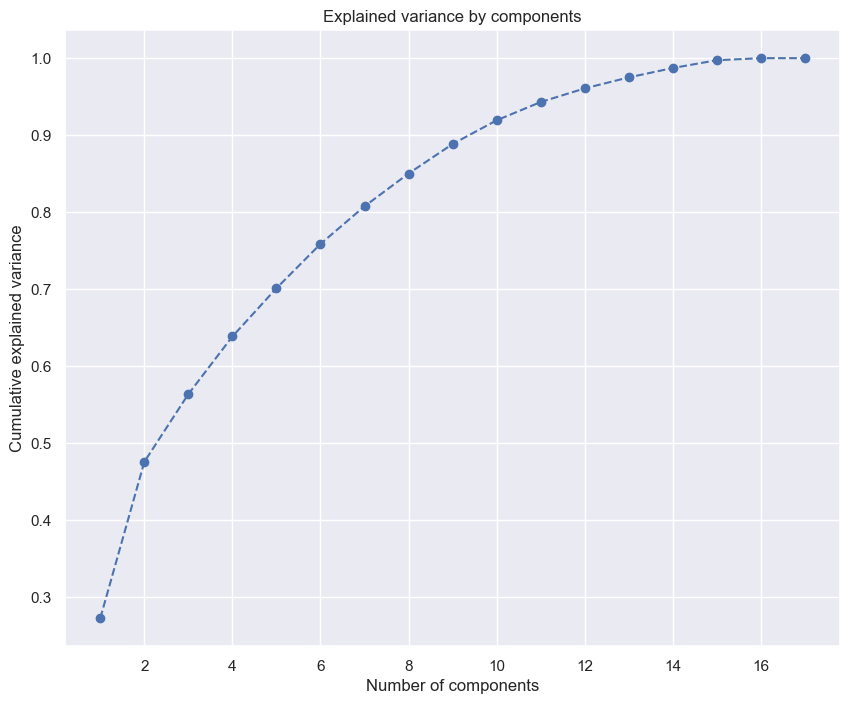

In [46]:
plt. figure (figsize=(10,8))
plt.plot(range(1,18),pca.explained_variance_ratio_.cumsum(), marker='o',linestyle='--')
plt.title ('Explained variance by components')
plt.xlabel ('Number of components')
plt.ylabel ('Cumulative explained variance')

We choose **6 components** as they together explain more than 75 percent of the explained variance.

In [47]:
pca=PCA(n_components=6)
pca.fit(data_seg_st)

PCA(n_components=6)

In [48]:
data_PCAComp=pd.DataFrame (data=pca.components_, columns =data_seg.columns.values, \
                           index=['comonent1','comonent2', 'comonent3','comonent4','comonent5','comonent6'])
data_PCAComp

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
comonent1,0.101066,0.120043,0.411644,0.346390,0.336827,-0.023353,0.321496,0.294619,0.274718,-0.089149,-0.048663,0.390694,0.211679,0.266239,0.060346,0.132116,0.081031
comonent2,0.403964,0.130556,0.041004,0.062874,-0.018521,0.439242,-0.190762,-0.017915,-0.178584,0.434079,0.419734,-0.019380,0.238692,0.257482,0.166974,-0.190020,-0.004304
comonent3,-0.160093,-0.420649,0.257881,0.392126,-0.110425,-0.027299,-0.374697,0.115104,-0.473398,-0.109033,-0.115490,-0.077302,0.100387,0.276302,-0.221655,0.124803,-0.064326
comonent4,0.283434,0.149691,0.039060,0.078152,-0.051156,-0.254573,-0.188996,0.027479,-0.215038,-0.264263,-0.326946,-0.018138,0.131809,-0.114736,0.402837,-0.424345,0.435364
comonent5,0.047566,-0.484481,0.031489,-0.155784,0.360338,0.096626,-0.092482,-0.531639,0.180199,-0.137328,-0.078263,-0.030247,0.072959,0.193734,0.431432,0.136000,-0.039059
comonent6,0.039871,0.035549,0.176364,0.184730,0.077640,-0.146824,-0.037283,0.024897,-0.052494,0.066017,-0.057722,0.103840,-0.321391,-0.126914,0.276254,-0.357479,-0.746717


To get a better idea of the relationship between components and original features, I use **heatmap** to see the correlations between them:

([<matplotlib.axis.YTick at 0x180b446a4f0>,
 [Text(0, 0, 'comonent1'),
  Text(0, 1, 'comonent2'),
  Text(0, 2, 'comonent3'),
  Text(0, 3, 'comonent4'),
  Text(0, 4, 'comonent5'),
  Text(0, 5, 'comonent6')])

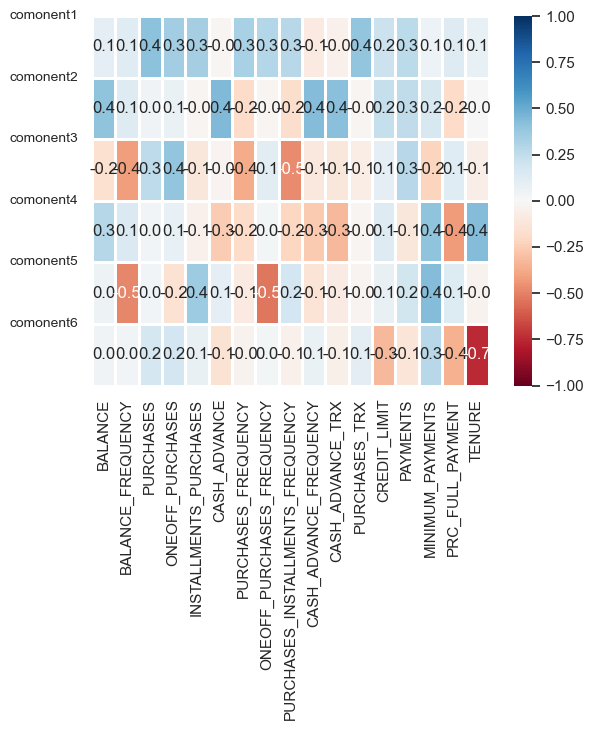

In [49]:
sns.heatmap (data_PCAComp,vmin=-1,vmax=1,cmap='RdBu',annot=True,fmt=".1f",linewidth=1)
plt.yticks ([0,1,2,3,4,5], ['comonent1','comonent2', 'comonent3','comonent4','comonent5','comonent6']\
           , fontsize=10)

**Component 1**: High correlation with PURCHASES and PURCHASES_TRX

**Component 2**: High correlation with BALANCE and CASH_ADVANCE

**Component 3**: High correlation with Balance frequency and PURCHASES frequency

**Component 4**: High correlation with minimum payment, percentage of full payment and TENURE.

**Component 5**: High correlation with BALANCE_Freq, installment purchases, oneoff purchases freq

**Component 6**: High correlation with percentage of full payment and TENURE

Now I transform the original data into six dimentionals. The result is a new array where each observation is described by the six components.

In [50]:
scores_PCA= pca.transform (data_seg_st)

Here, I'll segment the data using K-means clustering using Principal components as features (re-use the code for k-means)

In [51]:
wcss=[]
for i in range (1,11):
    kmeans_pca=KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans_pca.fit (scores_PCA)
    wcss.append(kmeans_pca.inertia_)

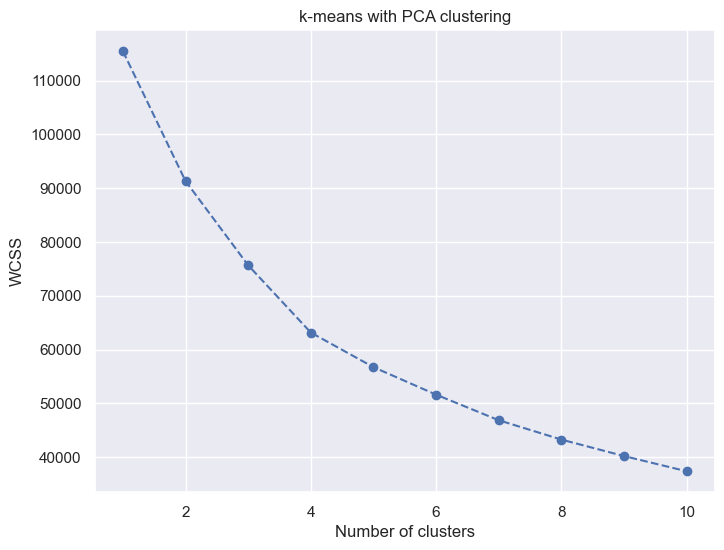

In [52]:
#visualise the WCSS by number of clusters
plt.figure(figsize=(8,6))
plt.plot (range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel ('Number of clusters')
plt.ylabel ('WCSS')
plt.title('k-means with PCA clustering')
plt.show()

Again we choose **clusters=5**

In [53]:
kmeans_pca=KMeans(n_clusters=5, init='k-means++', random_state=123)
kmeans_pca.fit (scores_PCA)

KMeans(n_clusters=5, random_state=123)

In [54]:
#Adding the values of the seperate components to our segmentation dataset
DF_pca_kmeans=pd.concat ([data_seg.reset_index (drop=True), pd.DataFrame(scores_PCA)], axis=1)
DF_pca_kmeans.columns.values[-6:]=['comonent1','comonent2', 'comonent3','comonent4','comonent5','comonent6']
DF_pca_kmeans['Segment-PCAKmeans']=kmeans_pca.labels_
DF_pca_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,comonent1,comonent2,comonent3,comonent4,comonent5,comonent6,Segment-PCAKmeans
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,-1.682238,-1.076494,0.488458,0.665529,0.018486,0.051019,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,-1.138371,2.506470,0.601284,-0.120171,0.605297,-1.137214,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,0.969616,-0.383459,0.102015,1.209435,-2.173194,-0.216811,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,864.206542,0.000000,12,-0.873671,0.043107,1.459935,1.152202,0.295415,-0.123875,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,-1.599465,-0.688611,0.365013,0.990195,-0.486778,0.075668,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,48.886365,0.500000,6,-0.359663,-2.016192,-0.995339,-2.727833,0.269520,2.671845,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,864.206542,0.000000,6,-0.564411,-1.639178,-1.290280,-1.861117,0.188095,3.383103,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,82.418369,0.250000,6,-0.926245,-1.810866,-0.474735,-2.280643,0.387302,2.975590,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,55.755628,0.250000,6,-2.336627,-0.658119,0.974753,-1.861621,0.070723,3.173436,0


In [55]:
DF_Freq_pca_kmeans=DF_pca_kmeans.groupby (['Segment-PCAKmeans']).mean()
DF_Freq_pca_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,comonent1,comonent2,comonent3,comonent4,comonent5,comonent6
Segment-PCAKmeans,,,,,,,,,,,,,,,,,,,,,
0,1068.346585,0.797630,282.307367,231.993432,50.313935,603.269504,0.167489,0.100885,0.065411,0.115896,...,992.222904,608.573608,0.068002,11.449949,-1.324745,-0.148558,0.629844,0.356977,0.016480,0.133227
1,4983.495833,0.978397,15103.252151,10252.616882,4850.635269,1090.621374,0.933513,0.756729,0.786298,0.086021,...,15343.408698,3442.644530,0.366803,11.903226,11.495302,2.434828,3.332099,0.610055,1.589736,1.605147
2,4518.951161,0.967753,460.236573,283.944277,176.292296,4584.198175,0.271252,0.127792,0.173921,0.491038,...,3527.878705,1941.379746,0.036908,11.392007,-0.547618,3.534694,-0.398951,-0.449265,0.035140,-0.247469
3,1944.012179,0.982664,3104.018361,2086.574863,1017.443498,377.374645,0.933304,0.723325,0.623084,0.061337,...,2949.483581,799.343428,0.264763,11.912157,2.938148,-0.369944,0.005146,0.139152,-0.816692,-0.105006
4,630.838329,0.901211,788.062279,179.551104,608.511175,174.088031,0.852721,0.109980,0.770831,0.037588,...,920.168569,693.726846,0.277180,11.465737,0.394423,-1.327800,-0.916793,-0.436893,0.313906,-0.096983


Since we still have five clusters and the components are based on our original features, it is expected that we have similar clusters to those we got with k-means without PCA.

Cluster 0: **FinanciallyStressed**

Cluster 1: **ProsperousAndConsent**

Cluster 2: **DealChasers**

Cluster 3: **SelfAwareAvoiders**

Cluster 4: **RecoveringCreditUsers**

In [57]:
DF_Freq_pca_kmeans['NObservations']= DF_pca_kmeans[['Segment-PCAKmeans','PURCHASES']].groupby (['Segment-PCAKmeans']).count()
DF_Freq_pca_kmeans['PropObservations']=DF_Freq_pca_kmeans['NObservations']/DF_Freq_pca_kmeans['NObservations'].sum()
DF_Freq_pca_kmeans =DF_Freq_pca_kmeans.rename ({0: 'FinanciallyStressed', 1: 'ProsperousAndConsent', 2: 'DealChasers',\
                                                3: 'SelfAwareAvoiders', 4:'RecoveringCreditUsers'})
DF_Freq_pca_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,comonent1,comonent2,comonent3,comonent4,comonent5,comonent6,NObservations,PropObservations
Segment-PCAKmeans,,,,,,,,,,,,,,,,,,,,,
FinanciallyStressed,1068.346585,0.797630,282.307367,231.993432,50.313935,603.269504,0.167489,0.100885,0.065411,0.115896,...,0.068002,11.449949,-1.324745,-0.148558,0.629844,0.356977,0.016480,0.133227,3896,0.435307
ProsperousAndConsent,4983.495833,0.978397,15103.252151,10252.616882,4850.635269,1090.621374,0.933513,0.756729,0.786298,0.086021,...,0.366803,11.903226,11.495302,2.434828,3.332099,0.610055,1.589736,1.605147,93,0.010391
DealChasers,4518.951161,0.967753,460.236573,283.944277,176.292296,4584.198175,0.271252,0.127792,0.173921,0.491038,...,0.036908,11.392007,-0.547618,3.534694,-0.398951,-0.449265,0.035140,-0.247469,1176,0.131397
SelfAwareAvoiders,1944.012179,0.982664,3104.018361,2086.574863,1017.443498,377.374645,0.933304,0.723325,0.623084,0.061337,...,0.264763,11.912157,2.938148,-0.369944,0.005146,0.139152,-0.816692,-0.105006,1275,0.142458
RecoveringCreditUsers,630.838329,0.901211,788.062279,179.551104,608.511175,174.088031,0.852721,0.109980,0.770831,0.037588,...,0.277180,11.465737,0.394423,-1.327800,-0.916793,-0.436893,0.313906,-0.096983,2510,0.280447


**Pie chart for PropObservations**

([<matplotlib.patches.Wedge at 0x180b2dbfbb0>,
 [Text(0.22202615366401812, 1.077359915297187, 'FinanciallyStressed'),
  Text(-1.0240282869227286, 0.40170395514869134, 'ProsperousAndConsent'),
  Text(-1.097181024156965, -0.07870070031374396, 'DealChasers'),
  Text(-0.6558990110239157, -0.8830608627596683, 'SelfAwareAvoiders'),
  Text(0.6999756368069909, -0.8485482354448967, 'RecoveringCreditUsers')],
 [Text(0.12110517472582805, 0.5876508628893747, '43.5%'),
  Text(-0.5585608837760337, 0.21911124826292253, '1.0%'),
  Text(-0.5984623768128899, -0.04292765471658761, '13.1%'),
  Text(-0.35776309692213576, -0.48166956150527357, '14.2%'),
  Text(0.3818048928038132, -0.46284449206085265, '28.0%')])

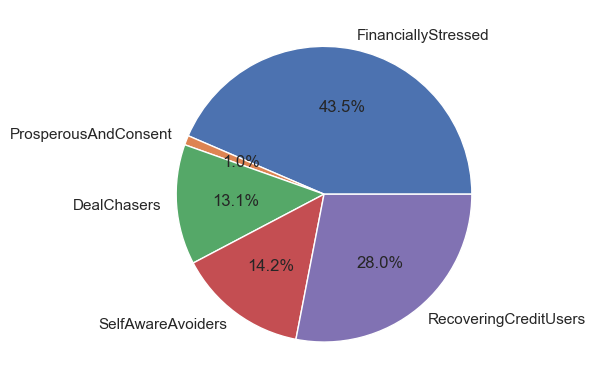

In [58]:
fig, ax = plt.subplots()
y= DF_Freq_pca_kmeans['PropObservations']
mylabels= ['FinanciallyStressed', 'ProsperousAndConsent', 'DealChasers', 'SelfAwareAvoiders','RecoveringCreditUsers']
ax.pie(y , labels= mylabels , autopct='%1.1f%%')

**Vsualising clusters on a 2D plane**

I use two of the components and use them as axis for visualisation. The point of PCA is to determine the most important components, so we can be sure that the first two components explain more variance than the other ones.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


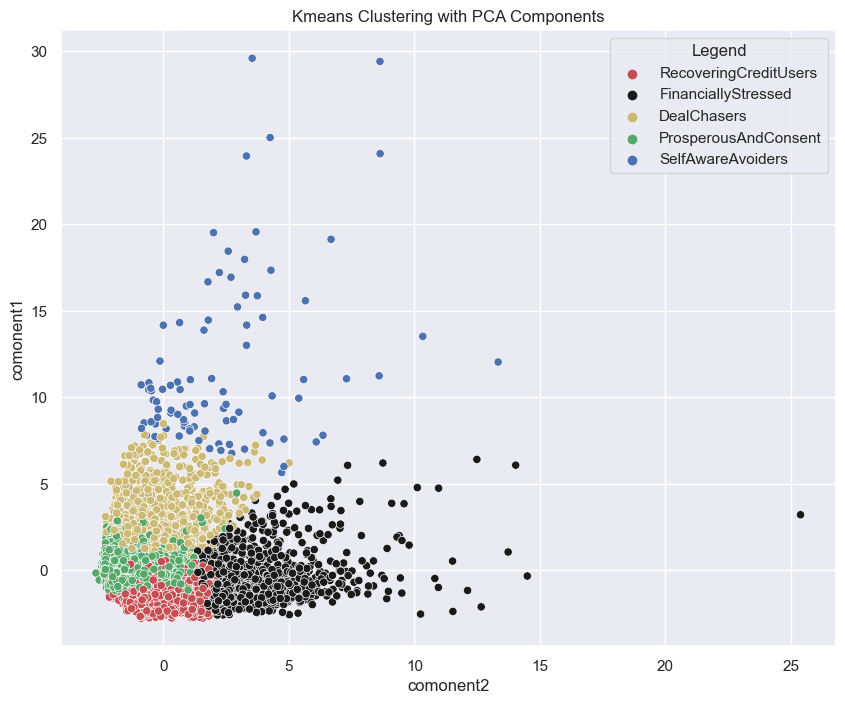

In [59]:
DF_pca_kmeans['Legend']=DF_pca_kmeans['Segment-PCAKmeans']\
.map({0: 'RecoveringCreditUsers', 1: 'SelfAwareAvoiders', 2: 'FinanciallyStressed', 3: 'DealChasers', 4:'ProsperousAndConsent'})
x_ax= DF_pca_kmeans['comonent2']
y_ax= DF_pca_kmeans['comonent1']
plt.figure(figsize=(10,8))
sns.scatterplot (x_ax, y_ax, hue= DF_pca_kmeans['Legend'], palette=['r','k','y','g','b'])
plt.title ('Kmeans Clustering with PCA Components')
plt.show()

It can be seen that the clusters are distinguishable from each other and the overlaps that exist are due to the absence of other components in this diagram.

## 6- summary

In this project, I have tried to find the five clusters introduced in the McKinsey study of credit card customers in the data under review. As it was obtained from the results, more than **71%** of the customers were from the "RecoveringCreditUsers" and "FinanciallyStressed" clusters, that is, customers who do not have a good financial situation. According to this result, the following suggestions can be made regarding providing better services to this type of customers based on the McKinsey study:  
* A product that helps them budget their spending—for instance, by allowing them to define spending “buckets” for various merchant types with monthly limits  
* Enable them to carry a credit card designed specifically for larger purchases that take time to pay off.